# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [282]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [283]:
# First make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string

# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [284]:
# checkout the first few rows of data
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [285]:
# check out column names
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            348 non-null    datetime64[ns]
 1   City of London        349 non-null    object        
 2   Barking & Dagenham    349 non-null    object        
 3   Barnet                349 non-null    object        
 4   Bexley                349 non-null    object        
 5   Brent                 349 non-null    object        
 6   Bromley               349 non-null    object        
 7   Camden                349 non-null    object        
 8   Croydon               349 non-null    object        
 9   Ealing                349 non-null    object        
 10  Enfield               349 non-null    object        
 11  Greenwich             349 non-null    object        
 12  Hackney               349 non-null    object        
 13  Hammersmith & Fulham

In [286]:
properties.describe()

,Unnamed: 0,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,348,0.0,0.0,0.0
mean,2009-06-16 07:43:26.896551680,NaN,NaN,NaN
min,1995-01-01 00:00:00,NaN,NaN,NaN
25%,2002-03-24 06:00:00,NaN,NaN,NaN
50%,2009-06-16 00:00:00,NaN,NaN,NaN
75%,2016-09-08 12:00:00,NaN,NaN,NaN
max,2023-12-01 00:00:00,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN


## Initial Observations

**Null Values** The properties dataset has several columns that are solely null values: 'Unnamed: 34', 'Unnamed: 37', and 'Unnamed: 47'. These will have to be deleted.

**Irrelevant Values** As mentioned above, accoring to Wikipedia, there are only 32 London Boroughs. Some of the buroughs listed are not actually buroughs. They seem to be regions, for example, East Midlands. 

**Intersting Values** Also, two other geographical areas have been included that are technically not buroughs, but may be interesting for analysis: City of London and England. 

**Data Transformation** Additionally, we will want to do the folloing transformation to prep the data for analysis:
* Organize columns by variables: burough, date, avg-price. This will allow for more machine-readable data. 
* Convert all the numerical values from objects into floats. 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [287]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [288]:
# remove unnecessary columns
properties.drop(columns=['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], inplace=True)

In [289]:
# verify columns have been removed
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            348 non-null    datetime64[ns]
 1   City of London        349 non-null    object        
 2   Barking & Dagenham    349 non-null    object        
 3   Barnet                349 non-null    object        
 4   Bexley                349 non-null    object        
 5   Brent                 349 non-null    object        
 6   Bromley               349 non-null    object        
 7   Camden                349 non-null    object        
 8   Croydon               349 non-null    object        
 9   Ealing                349 non-null    object        
 10  Enfield               349 non-null    object        
 11  Greenwich             349 non-null    object        
 12  Hackney               349 non-null    object        
 13  Hammersmith & Fulham

In [290]:
properties.isna().sum()

Unnamed: 0              1
City of London          0
Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
Inner London            0
Outer London            0
NORTH EAST              0
NORTH WEST              0
YORKS & THE 

In [291]:
# tranposing df to have buroughs and IDs in rows vs. columns and resetting the index
properties_transposed = properties.transpose().reset_index()
properties_transposed.head()

,index,0,1,2,3,4,5,6,7,8,...,339,340,341,342,343,344,345,346,347,348
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,926023,900447,960485,995816,973945,909574,886619,884062,839079,802168
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,343471,346218,347481,343944,341264,341115,338301,338600,343037,340485
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,597927,588354,572839,569078,574332,584285,587519,581031,582184,577548
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,395215,394399,388948,387261,390037,388763,389314,383637,386701,377926


In [292]:
# set first row as the column names
new_headers = properties_transposed.iloc[0]
properties_transposed = properties_transposed[1:]
properties_transposed.columns = new_headers
properties_transposed.head(2)

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,926023,900447,960485,995816,973945,909574,886619,884062,839079,802168
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,343471,346218,347481,343944,341264,341115,338301,338600,343037,340485


In [293]:
properties_transposed.columns

Index([       'Unnamed: 0',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00,
       2023-06-01 00:00:00, 2023-07-01 00:00:00, 2023-08-01 00:00:00,
       2023-09-01 00:00:00, 2023-10-01 00:00:00, 2023-11-01 00:00:00,
       2023-12-01 00:00:00],
      dtype='object', name=0, length=350)

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [333]:
# rename burough and ID columns
properties_v1 = properties_transposed.rename(columns={'Unnamed: 0': 'burough', 'NaT': 'id'})

I seem to be running into issues renaming my second column from 'NaT' to 'id'. I prompted ChatGPT to problem-solve with me and learned that the issue is likely due to the fact that this column name is being read as a "Not a Time" value, which is neither a `string` or another exisitng column label formal that the `.rename()` can process. 

To address this issue, I will need to convert column 2's header to a `string` before I can rename it to "id". 

In [295]:
properties_v1.columns[1]

NaT

In [334]:
# convert the headers to a list
properties_v1_columns = properties_v1.columns.tolist()

# convert the second column header to a string value
properties_v1_columns[1] = str(properties_v1.columns[1])

# change the name to 'id'
properties_v1_columns[1] = 'id'

# replace the column name
properties_v1.columns = properties_v1_columns
properties_v1.columns[1]

'id'

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [297]:
properties_transformed = properties_v1.melt(id_vars=['burough', 'id'], var_name='date', value_name='avg_price')
properties_transformed.head()

,burough,id,date,avg_price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [298]:
properties_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   burough    15660 non-null  object
 1   id         15660 non-null  object
 2   date       15660 non-null  object
 3   avg_price  15660 non-null  object
dtypes: object(4)
memory usage: 489.5+ KB


Ok this is looking a lot better. We still have two things left to do before analyzing the data:
1. Remove the timestamps from the date column as this is irrelevant information.
2. Convert hte avg_price column values to float objects.

In [299]:
# display date column as date only without the timestamps
from datetime import datetime, date

properties_transformed['date'] = pd.to_datetime(properties_transformed['date']).dt.date
print(properties_transformed.head())
print()
print(properties_transformed.info())

              burough         id        date    avg_price
0      City of London  E09000001  1995-01-01  91448.98487
1  Barking & Dagenham  E09000002  1995-01-01   50460.2266
2              Barnet  E09000003  1995-01-01  93284.51832
3              Bexley  E09000004  1995-01-01  64958.09036
4               Brent  E09000005  1995-01-01  71306.56698

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   burough    15660 non-null  object
 1   id         15660 non-null  object
 2   date       15660 non-null  object
 3   avg_price  15660 non-null  object
dtypes: object(4)
memory usage: 489.5+ KB
None


In [300]:
# convert avg_price to float objects and round to 3 decimal points
properties_transformed['avg_price'] = properties_transformed['avg_price'].astype(float).round(0)
properties_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   burough    15660 non-null  object 
 1   id         15660 non-null  object 
 2   date       15660 non-null  object 
 3   avg_price  15660 non-null  float64
dtypes: float64(1), object(3)
memory usage: 489.5+ KB


In [301]:
properties_transformed.head()

,burough,id,date,avg_price
0,City of London,E09000001,1995-01-01,91449.0
1,Barking & Dagenham,E09000002,1995-01-01,50460.0
2,Barnet,E09000003,1995-01-01,93285.0
3,Bexley,E09000004,1995-01-01,64958.0
4,Brent,E09000005,1995-01-01,71307.0


In [302]:
#verify that we do not have any null values in the dataset
properties_transformed.isnull().sum()

burough      0
id           0
date         0
avg_price    0
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

Ok, the last step is to subset the dataframe to only include actual London buroughs. 

According to Wikipedia, the London buroughs are:

*City of Westminster, Kensington and Chelsea, Hammersmith and Fulham, Wandsworth, Lambeth, Southwark, Tower Hamlets, Hackney, Islington, Camden, Brent, Ealing, Hounslow, Richmond upon Thames, Kingston upon Thames, Merton, Sutton, Croydon, Bromley, Lewisham, Greenwich, Bexley, Havering, Barking and Dagenham, Redbridge, Newham, Waltham Forest, Haringey, Enfield, Barnet, Harrow, Hillingdon.*

In [303]:
# create list of london burough names
london_burough_names = ['City of Westminster', 'Kensington & Chelsea', 'Hammersmith & Fulham', 'Wandsworth', 'Lambeth', 'Southwark',
                        'Tower Hamlets', 'Hackney', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow', 'Richmond upon Thames', 
                        'Kingston upon Thames', 'Merton', 'Sutton', 'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
                        'Barking & Dagenham', 'Redbridge', 'Newham', 'Waltham Forest', 'Haringey', 'Enfield', 'Barnet', 'Harrow', 
                        'Hillingdon']

# subset dataframe with the rows that align with actual london buroughs
london_buroughs = properties_transformed[properties_transformed['burough'].isin(london_burough_names)]


# check the number of buroughs
print(london_buroughs['burough'].nunique())

# check the burough names
print(london_buroughs['burough'].unique())

31
['Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney' 'Hammersmith & Fulham'
 'Haringey' 'Harrow' 'Havering' 'Hillingdon' 'Hounslow' 'Islington'
 'Kensington & Chelsea' 'Kingston upon Thames' 'Lambeth' 'Lewisham'
 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth']


We are missing a burough. I need to figure out which one. 

In [304]:
# create df containing current unique burough names
dataset_buroughs = properties_transformed['burough'].unique()
buroughs_df = pd.DataFrame(dataset_buroughs, columns=['og_burough'])

,og_burough
0,City of London
1,Barking & Dagenham
2,Barnet


In [305]:
# convert london buroughs list to a df to join with my df_buroughs and find the missing burough
london_df = pd.DataFrame(london_burough_names, columns=['actual_buroughs'])

# join the dataframes
burough_verification = london_df.merge(buroughs_df, how='left', left_on='actual_buroughs', right_on='og_burough')
burough_verification

,actual_buroughs,og_burough
0,City of Westminster,NaN
1,Kensington & Chelsea,Kensington & Chelsea
2,Hammersmith & Fulham,Hammersmith & Fulham
3,Wandsworth,Wandsworth
4,Lambeth,Lambeth
5,Southwark,Southwark
6,Tower Hamlets,Tower Hamlets
7,Hackney,Hackney
8,Islington,Islington
9,Camden,Camden


The discrepency is with Westminster. Wikipedia refers to this burough as 'City of Westminster' vs the dataset I pulled information from says 'Westminster'. This is an easy fix!

In [306]:
# modify list of london burough names
london_burough_names = ['Westminster', 'Kensington & Chelsea', 'Hammersmith & Fulham', 'Wandsworth', 'Lambeth', 'Southwark',
                        'Tower Hamlets', 'Hackney', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow', 'Richmond upon Thames', 
                        'Kingston upon Thames', 'Merton', 'Sutton', 'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
                        'Barking & Dagenham', 'Redbridge', 'Newham', 'Waltham Forest', 'Haringey', 'Enfield', 'Barnet', 'Harrow', 
                        'Hillingdon']

# subset dataframe again
london_buroughs = properties_transformed[properties_transformed['burough'].isin(london_burough_names)].copy()

# check the number of buroughs
print(london_buroughs['burough'].nunique())

32


In [307]:
london_buroughs.head()

,burough,id,date,avg_price
1,Barking & Dagenham,E09000002,1995-01-01,50460.0
2,Barnet,E09000003,1995-01-01,93285.0
3,Bexley,E09000004,1995-01-01,64958.0
4,Brent,E09000005,1995-01-01,71307.0
5,Bromley,E09000006,1995-01-01,81671.0


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [308]:
# converting the date column to a datetime object
london_buroughs['date'] = pd.to_datetime(london_buroughs['date'])

# creating year and month columns for further analysis
london_buroughs['year'] = london_buroughs['date'].dt.year
london_buroughs['month'] = london_buroughs['date'].dt.month

# view the first few rows of data
london_buroughs.head()

,burough,id,date,avg_price,year,month
1,Barking & Dagenham,E09000002,1995-01-01,50460.0,1995,1
2,Barnet,E09000003,1995-01-01,93285.0,1995,1
3,Bexley,E09000004,1995-01-01,64958.0,1995,1
4,Brent,E09000005,1995-01-01,71307.0,1995,1
5,Bromley,E09000006,1995-01-01,81671.0,1995,1


I realize now that I don't need the id column since all of the burough names are unique.

In [309]:
# removing id column
london_buroughs.drop(columns='id', inplace=True)
london_buroughs.head(1)

,burough,date,avg_price,year,month
1,Barking & Dagenham,1995-01-01,50460.0,1995,1


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [310]:
# create a pivot to show the average home price per year for each burough
avg_price_by_city_vs_year = london_buroughs.pivot_table(values='avg_price', index='burough', columns='year').round()


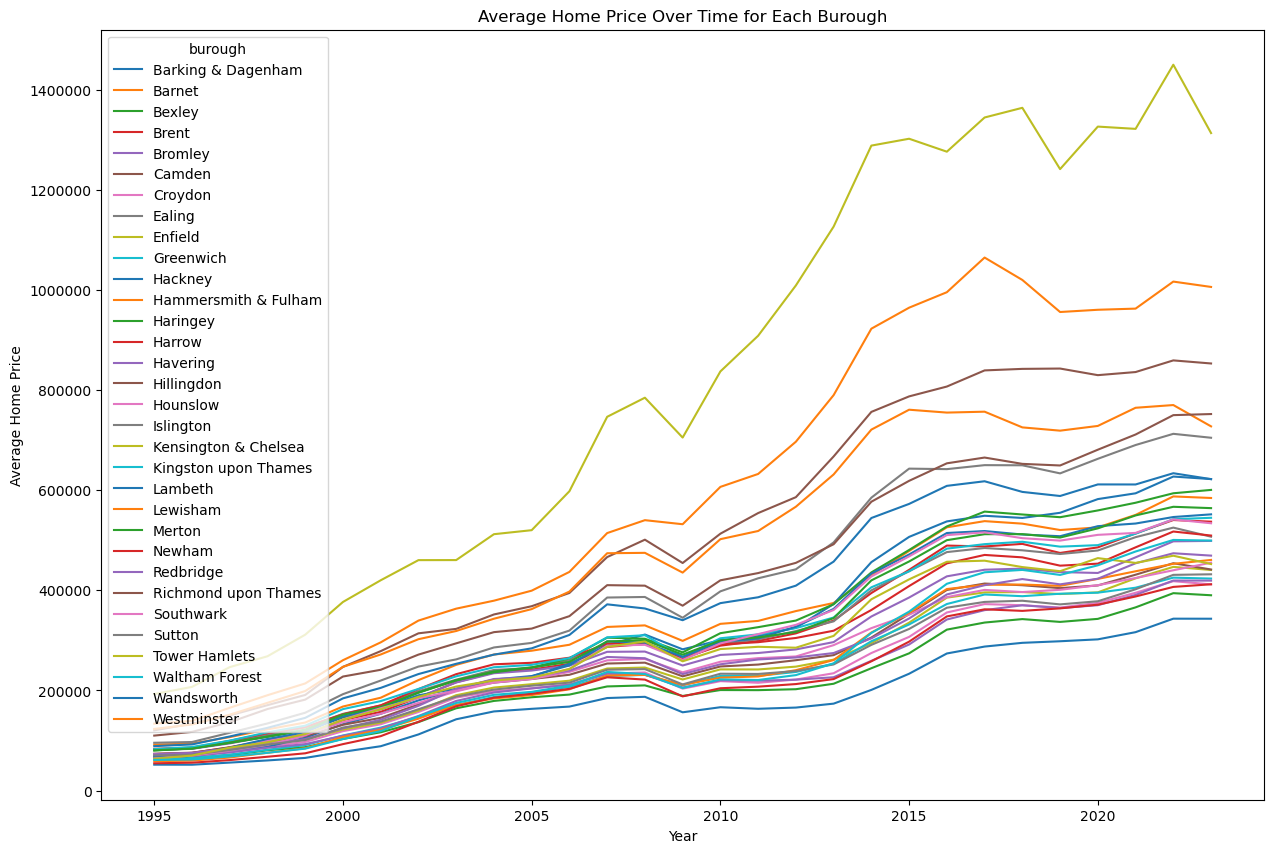

In [311]:
avg_price_by_city_vs_year.T.plot(figsize=(15,10))
plt.title('Average Home Price Over Time for Each Burough')
plt.xlabel('Year')
plt.ylabel('Average Home Price')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [312]:
london_buroughs['date'].max()

Timestamp('2023-12-01 00:00:00')

In [313]:
old_house_price = london_buroughs[london_buroughs['year'] == 1995]
old_house_price_avg = old_house_price.groupby('burough')['avg_price'].agg('mean').round()
old_house_price_avg_srt = old_house_price_avg.sort_values(ascending=False).reset_index()
old_house_price_avg_srt

,burough,avg_price
0,Kensington & Chelsea,192857.0
1,Westminster,133689.0
2,Hammersmith & Fulham,123238.0
3,Camden,120367.0
4,Richmond upon Thames,109892.0
5,Islington,95555.0
6,Barnet,91792.0
7,Wandsworth,88829.0
8,Harrow,83520.0
9,Kingston upon Thames,82839.0


In [314]:
new_house_price = london_buroughs[london_buroughs['year'] == 2023]
new_house_price_avg = new_house_price.groupby('burough')['avg_price'].agg('mean').round()
new_house_price_avg_srt = new_house_price_avg.sort_values(ascending=False).reset_index()
new_house_price_avg_srt

,burough,avg_price
0,Kensington & Chelsea,1313421.0
1,Westminster,1006072.0
2,Camden,853200.0
3,Richmond upon Thames,752191.0
4,Hammersmith & Fulham,727586.0
5,Islington,704825.0
6,Hackney,622262.0
7,Wandsworth,622169.0
8,Haringey,600636.0
9,Barnet,584510.0


In [315]:
# join old and new house price sorted lists on burough name
change_in_price = old_house_price_avg_srt.merge(new_house_price_avg_srt, on='burough', suffixes=('_1995', '_2023'))
change_in_price

,burough,avg_price_1995,avg_price_2023
0,Kensington & Chelsea,192857.0,1313421.0
1,Westminster,133689.0,1006072.0
2,Hammersmith & Fulham,123238.0,727586.0
3,Camden,120367.0,853200.0
4,Richmond upon Thames,109892.0,752191.0
5,Islington,95555.0,704825.0
6,Barnet,91792.0,584510.0
7,Wandsworth,88829.0,622169.0
8,Harrow,83520.0,509490.0
9,Kingston upon Thames,82839.0,544956.0


In [316]:
# add a column to show the percent change for each burough bewtween 1995 and 2023
change_in_price['perc_change'] = ((change_in_price['avg_price_2023'] - change_in_price['avg_price_1995'] )/ change_in_price['avg_price_1995'] * 100).round()
change_in_price['gbp_change'] = change_in_price['avg_price_2023'] - change_in_price['avg_price_1995']
change_in_price

,burough,avg_price_1995,avg_price_2023,perc_change,gbp_change
0,Kensington & Chelsea,192857.0,1313421.0,581.0,1120564.0
1,Westminster,133689.0,1006072.0,653.0,872383.0
2,Hammersmith & Fulham,123238.0,727586.0,490.0,604348.0
3,Camden,120367.0,853200.0,609.0,732833.0
4,Richmond upon Thames,109892.0,752191.0,584.0,642299.0
5,Islington,95555.0,704825.0,638.0,609270.0
6,Barnet,91792.0,584510.0,537.0,492718.0
7,Wandsworth,88829.0,622169.0,600.0,533340.0
8,Harrow,83520.0,509490.0,510.0,425970.0
9,Kingston upon Thames,82839.0,544956.0,558.0,462117.0


I figured out a way to simplify my original table comparing 1995 to 2023 data using a pivot table.

In [317]:
# filter london buroughs df by my years of interest
filtered_years = london_buroughs[london_buroughs['year'].isin([1995, 2023])]

#calculate average price for each year
avg_prices = filtered_years.pivot_table(values='avg_price', index='burough', columns='year', aggfunc='mean').round()

# show the new df
avg_prices

year,1995,2023
burough,,
Barking & Dagenham,51818.0,343340.0
Barnet,91792.0,584510.0
Bexley,64292.0,390222.0
Brent,73030.0,537189.0
Bromley,81967.0,498780.0
Camden,120367.0,853200.0
Croydon,68923.0,411981.0
Ealing,81219.0,507196.0
Enfield,71984.0,440723.0


In [331]:
# add a column to show the percent change for each burough bewtween 1995 and 2023
avg_prices['perc_change'] = ((avg_prices[2023] - avg_prices[1995] )/ avg_prices[1995] * 100).astype(int)
avg_prices['gbp_change'] = avg_prices[2023] - avg_prices[1995]
avg_prices

year,1995,2023,perc_change,gbp_change
burough,,,,
Barking & Dagenham,51818.0,343340.0,562,291522.0
Barnet,91792.0,584510.0,536,492718.0
Bexley,64292.0,390222.0,506,325930.0
Brent,73030.0,537189.0,635,464159.0
Bromley,81967.0,498780.0,508,416813.0
Camden,120367.0,853200.0,608,732833.0
Croydon,68923.0,411981.0,497,343058.0
Ealing,81219.0,507196.0,524,425977.0
Enfield,71984.0,440723.0,512,368739.0


In [332]:
# sort by the buroughs with greatest percent increase
perc_srt = change_in_price.sort_values('perc_change', ascending=False)
perc_srt.head(10)

,burough,avg_price_1995,avg_price_2023,perc_change,gbp_change
23,Hackney,66025.0,622262.0,842.0,556237.0
25,Southwark,64260.0,534024.0,731.0,469764.0
28,Waltham Forest,61280.0,499472.0,715.0,438192.0
22,Lambeth,68106.0,551811.0,710.0,483705.0
29,Lewisham,58882.0,460777.0,683.0,401895.0
30,Newham,54574.0,412149.0,655.0,357575.0
1,Westminster,133689.0,1006072.0,653.0,872383.0
13,Haringey,80078.0,600636.0,650.0,520558.0
5,Islington,95555.0,704825.0,638.0,609270.0
15,Brent,73030.0,537189.0,636.0,464159.0


<Axes: xlabel='burough'>

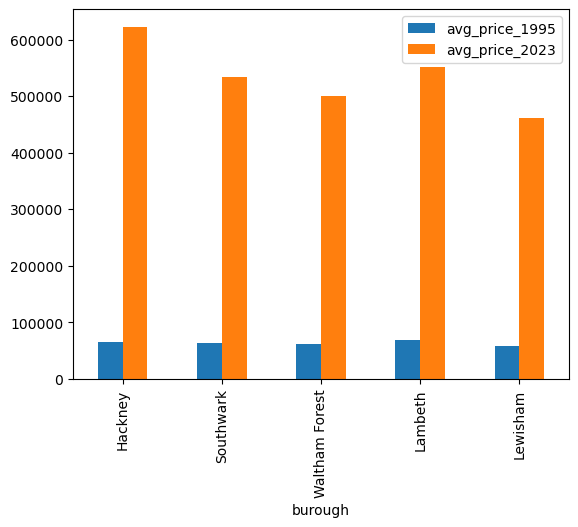

In [320]:
perc_srt[['burough', 'avg_price_1995', 'avg_price_2023']].head(5).plot(x='burough', kind='bar')

In [321]:
# sort by the buroughs with the greatest change in price (in Great British Pounds)
gbp_srt = change_in_price.sort_values('gbp_change', ascending=False)
gbp_srt.head()

,burough,avg_price_1995,avg_price_2023,perc_change,gbp_change
0,Kensington & Chelsea,192857.0,1313421.0,581.0,1120564.0
1,Westminster,133689.0,1006072.0,653.0,872383.0
3,Camden,120367.0,853200.0,609.0,732833.0
4,Richmond upon Thames,109892.0,752191.0,584.0,642299.0
5,Islington,95555.0,704825.0,638.0,609270.0


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [322]:
def create_price_ratio(burough_name, year_1, year_2):
    df = london_buroughs[london_buroughs['burough'] == burough_name]
    df_year_1 = df[df['year'] == year_1]
    avg_year_1 = df_year_1['avg_price'].mean().round(4)
    df_year_2 = df[df['year'] == year_2]
    avg_year_2 = df_year_2['avg_price'].mean().round(4)
    ratio = (avg_year_1 / avg_year_2).round(3)
    return ratio

In [323]:
def create_price_ratio_simple(burough_name, year_1, year_2):    
    
    # subset london_bouroughs by burough_name, year_1 and year_2
    df = london_buroughs[(london_buroughs['burough'] == burough_name) & (london_buroughs['year'].isin([year_1, year_2]))]

    # compute the mean for average price for year_1 and year_2
    avg_price = df.groupby('year')['avg_price'].mean().round(4)
    
    # compute the price ration for year_1 over year_2
    ratio = (avg_price[year_1] / avg_price[year_2]).round(3)

    return ratio


In [324]:
ken_chel_ratio = create_price_ratio('Kensington & Chelsea', 1995, 2023)
print(ken_chel_ratio)

0.147


In [325]:
ken_chel_ratio_2 = create_price_ratio_simple('Kensington & Chelsea', 1995, 2023)
print(ken_chel_ratio_2)

0.147


In [326]:
price_comp_dict = {}

burough_names = list(london_buroughs['burough'].unique())

for burough in burough_names:
    price_comp_dict[burough] = create_price_ratio_simple(burough, 1995, 2023)

print(price_comp_dict)

{'Barking & Dagenham': 0.151, 'Barnet': 0.157, 'Bexley': 0.165, 'Brent': 0.136, 'Bromley': 0.164, 'Camden': 0.141, 'Croydon': 0.167, 'Ealing': 0.16, 'Enfield': 0.163, 'Greenwich': 0.15, 'Hackney': 0.106, 'Hammersmith & Fulham': 0.169, 'Haringey': 0.133, 'Harrow': 0.164, 'Havering': 0.163, 'Hillingdon': 0.167, 'Hounslow': 0.16, 'Islington': 0.136, 'Kensington & Chelsea': 0.147, 'Kingston upon Thames': 0.152, 'Lambeth': 0.123, 'Lewisham': 0.128, 'Merton': 0.143, 'Newham': 0.132, 'Redbridge': 0.155, 'Richmond upon Thames': 0.146, 'Southwark': 0.12, 'Sutton': 0.163, 'Tower Hamlets': 0.141, 'Waltham Forest': 0.123, 'Wandsworth': 0.143, 'Westminster': 0.133}


In [327]:
ratio_df = pd.DataFrame.from_dict(price_comp_dict, orient='index', columns=['price_ratio'])
ratio_df.sort_values('price_ratio')

,price_ratio
Hackney,0.106
Southwark,0.120
Waltham Forest,0.123
Lambeth,0.123
Lewisham,0.128
Newham,0.132
Westminster,0.133
Haringey,0.133
Islington,0.136
Brent,0.136


In [328]:
# join ratio dataframe with average prices
ratio_avg_prices = avg_prices.merge(ratio_df, left_index=True, right_index=True)
ratio_avg_prices.sort_values(['price_ratio'])

,1995,2023,perc_change,gbp_change,price_ratio
burough,,,,,
Hackney,66025.0,622262.0,842.0,556237.0,0.106
Southwark,64260.0,534024.0,731.0,469764.0,0.120
Waltham Forest,61280.0,499472.0,715.0,438192.0,0.123
Lambeth,68106.0,551811.0,710.0,483705.0,0.123
Lewisham,58882.0,460777.0,683.0,401895.0,0.128
Newham,54574.0,412149.0,655.0,357575.0,0.132
Westminster,133689.0,1006072.0,653.0,872383.0,0.133
Haringey,80078.0,600636.0,650.0,520558.0,0.133
Islington,95555.0,704825.0,638.0,609270.0,0.136


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 